# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
!pip3 install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&appid=" + weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)


weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))


for i, city in enumerate (cities):
    if (i<10):
        print(f"{i} {city}")
        print(query_url + city)
        
    
    

{
    "coord": {
        "lon": 93.3,
        "lat": 54.1667
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": -23.71,
        "feels_like": -31.81,
        "temp_min": -23.71,
        "temp_max": -23.71,
        "pressure": 1043,
        "humidity": 85,
        "sea_level": 1043,
        "grnd_level": 961
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.01,
        "deg": 318
    },
    "clouds": {
        "all": 19
    },
    "dt": 1612024160,
    "sys": {
        "country": "RU",
        "sunrise": 1611970687,
        "sunset": 1612002111
    },
    "timezone": 25200,
    "id": 1502389,
    "name": "Koshurnikovo",
    "cod": 200
}
0 barrow
http://api.openweathermap.org/data/2.5/weather?appid=21cc1612f0fa7258b71c17759927eee2&units=imperial&q=barrow
1 airai
http://api.openweathermap.org/data/2.5/w

In [5]:
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
counter = 1

# Print Starting Log Statement
print(f"Data Retrieval Start")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Record {counter} | {city_record}")
        
        # Increase Counter by 1 For Each Loop
        counter += 1
        
    except:
        print("City not found. Skip") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")


Data Retrieval Start
Record 1 | Barrow
Record 2 | Airai
Record 3 | Ushuaia
Record 4 | Ostrovnoy
Record 5 | Araouane
Record 6 | Punta Arenas
Record 7 | Guilin
Record 8 | Ribeira Grande
Record 9 | Rikitea
Record 10 | Vaini
Record 11 | Hobart
Record 12 | New Norfolk
Record 13 | Muzhi
Record 14 | Hamilton
Record 15 | Nortelândia
Record 16 | Hermanus
Record 17 | Ponta do Sol
Record 18 | Busselton
Record 19 | Chokurdakh
Record 20 | Arraial do Cabo
Record 21 | Broome
Record 22 | Yevlax
Record 23 | Vao
City not found. Skip
Record 24 | Puerto Escondido
Record 25 | Albany
Record 26 | Ibaiti
City not found. Skip
Record 27 | Puerto Carreño
Record 28 | Provideniya
Record 29 | Hanmer Springs
Record 30 | Qaanaaq
Record 31 | Port Elizabeth
Record 32 | Hasaki
Record 33 | Kunashak
Record 34 | Ancud
Record 35 | Saskylakh
Record 36 | Tiksi
Record 37 | Novobirilyussy
Record 38 | Tautira
City not found. Skip
Record 39 | Tari
Record 40 | Nanortalik
Record 41 | São Filipe
Record 42 | Bredasdorp
Record 43 | Hu

Record 328 | Alenquer
Record 329 | Clyde River
Record 330 | Birao
Record 331 | Wahiawā
Record 332 | Naze
Record 333 | Dali
Record 334 | Wajima
Record 335 | Praia da Vitória
Record 336 | Bonthe
Record 337 | Mehamn
Record 338 | Eskil
Record 339 | Ilulissat
Record 340 | Sitka
Record 341 | Fort-Shevchenko
Record 342 | Rock Sound
Record 343 | Alofi
Record 344 | Olavarría
Record 345 | Mar del Plata
Record 346 | Yinchuan
Record 347 | Port Macquarie
Record 348 | Longyearbyen
Record 349 | Klaksvík
Record 350 | Kailua
Record 351 | Coquimbo
Record 352 | Maltahöhe
Record 353 | Turukhansk
Record 354 | Mogzon
Record 355 | Vostok
Record 356 | Burgersdorp
Record 357 | Strezhevoy
Record 358 | Plainview
Record 359 | Ust'-Ordynskiy
Record 360 | Eldoret
Record 361 | Forécariah
Record 362 | Saint-Joseph
Record 363 | Yulara
Record 364 | Sabha
Record 365 | Caucayá
Record 366 | Tongchuanshi
Record 367 | Alvorada
Record 368 | Laguna
Record 369 | Batī
Record 370 | Gijang
Record 371 | Misratah
Record 372 | Heide

In [6]:
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Barrow,US,1612024081,71.2906,-156.7887,-5.80,77,90,11.50
1,Airai,TL,1612024224,-8.9266,125.4092,61.68,100,100,5.01
2,Ushuaia,AR,1612024075,-54.8000,-68.3000,51.80,62,20,27.63
3,Ostrovnoy,RU,1612024112,68.0531,39.5131,11.14,94,100,11.59
4,Araouane,ML,1612024442,18.9048,-3.5265,83.30,13,26,7.07
...,...,...,...,...,...,...,...,...,...
521,Honiara,SB,1612024338,-9.4333,159.9500,78.96,81,99,5.46
522,Albury,AU,1612024202,-36.0833,146.9167,63.00,94,0,4.61
523,Jilib,SO,1612024221,0.4883,42.7854,74.48,73,9,8.19
524,Gao,ML,1612024339,16.6362,1.6370,84.16,12,1,7.65


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_csv = weather_df.to_csv("./weather_csv")

In [8]:
weather_df

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Barrow,US,1612024081,71.2906,-156.7887,-5.80,77,90,11.50
1,Airai,TL,1612024224,-8.9266,125.4092,61.68,100,100,5.01
2,Ushuaia,AR,1612024075,-54.8000,-68.3000,51.80,62,20,27.63
3,Ostrovnoy,RU,1612024112,68.0531,39.5131,11.14,94,100,11.59
4,Araouane,ML,1612024442,18.9048,-3.5265,83.30,13,26,7.07
...,...,...,...,...,...,...,...,...,...
521,Honiara,SB,1612024338,-9.4333,159.9500,78.96,81,99,5.46
522,Albury,AU,1612024202,-36.0833,146.9167,63.00,94,0,4.61
523,Jilib,SO,1612024221,0.4883,42.7854,74.48,73,9,8.19
524,Gao,ML,1612024339,16.6362,1.6370,84.16,12,1,7.65


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_df["Humidity"].describe(include = "all")


count    526.000000
mean      71.268061
std       19.904400
min        7.000000
25%       60.000000
50%       76.000000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".




## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

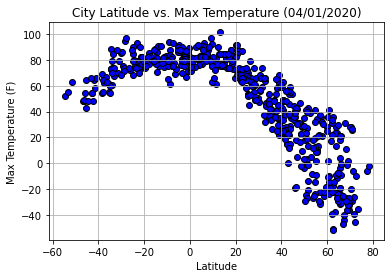

In [10]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"], facecolors="blue", marker="o", edgecolor="black")

plt.title("City Latitude vs. Max Temperature (04/01/2020)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("./lat_vs_temp.png")

plt.show()

## Latitude vs. Humidity Plot

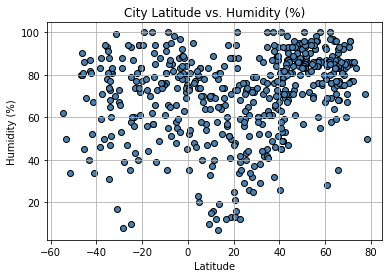

In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], facecolors="steelblue", marker="o", edgecolor="black")

plt.title("City Latitude vs. Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("./lat_vs_humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

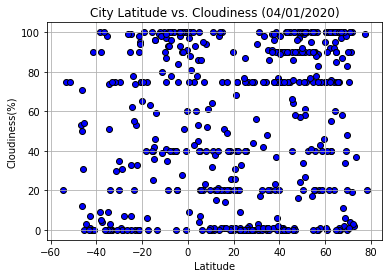

In [12]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

plt.title("City Latitude vs. Cloudiness (04/01/2020)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("./lat_vs_cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

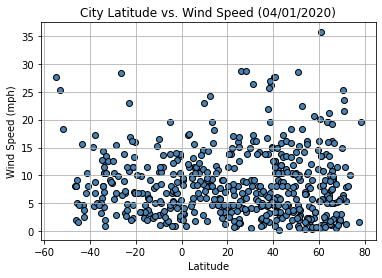

In [13]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], facecolors="steelblue", marker="o", edgecolor="black")

plt.title("City Latitude vs. Wind Speed (04/01/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("./lat_vs_windspeed.png")

plt.show()

## Linear Regression

In [14]:
northdf = weather_df.loc[weather_df['Latitude'] >= 0,:]
northdf.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Barrow,US,1612024081,71.2906,-156.7887,-5.80,77,90,11.50
3,Ostrovnoy,RU,1612024112,68.0531,39.5131,11.14,94,100,11.59
4,Araouane,ML,1612024442,18.9048,-3.5265,83.30,13,26,7.07
6,Guilin,CN,1612024443,25.2819,110.2864,53.60,76,40,2.13
7,Ribeira Grande,PT,1612024443,38.5167,-28.7000,64.40,88,75,19.57


In [15]:
southdf = weather_df.loc[weather_df['Latitude'] < 0,:]
southdf.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
1,Airai,TL,1612024224,-8.9266,125.4092,61.68,100,100,5.01
2,Ushuaia,AR,1612024075,-54.8000,-68.3000,51.80,62,20,27.63
5,Punta Arenas,CL,1612024077,-53.1500,-70.9167,55.40,50,75,25.32
8,Rikitea,PF,1612024443,-23.1203,-134.9692,79.07,74,74,10.80
9,Vaini,TO,1612024070,-21.2000,-175.2000,73.40,94,90,4.61


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r values is -0.8742369919675456


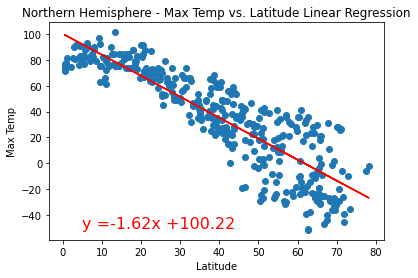

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northdf["Latitude"], northdf["Max Temperature"])
print(f'The r values is {rvalue}')
plt.scatter(northdf["Latitude"], northdf["Max Temperature"])
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
regress_values = northdf["Latitude"] * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.plot(northdf["Latitude"], regress_values, "r-")
plt.annotate(line_eq,(5,-50), fontsize= 16, color = 'red')
plt.savefig("./Nothern Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r values is 0.6602524516879907


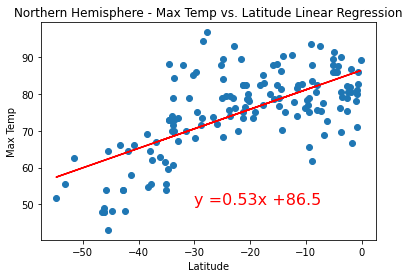

In [32]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southdf["Latitude"], southdf["Max Temperature"])
print(f'The r values is {rvalue}')
plt.scatter(southdf["Latitude"], southdf["Max Temperature"])
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
regress_values = southdf["Latitude"] * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.plot(southdf["Latitude"], regress_values, "r-")
plt.annotate(line_eq,(-30,50), fontsize= 16, color = 'red')

plt.savefig("./Southern Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r values is 0.45403131790323875


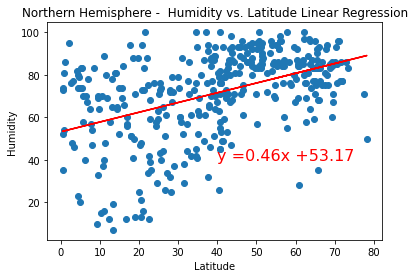

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northdf["Latitude"], northdf["Humidity"])
print(f'The r values is {rvalue}')
plt.scatter(northdf["Latitude"], northdf["Humidity"])
plt.title("Northern Hemisphere -  Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
regress_values = northdf["Latitude"] * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.plot(northdf["Latitude"], regress_values, "r-")
plt.annotate(line_eq,(40,40), fontsize= 16, color = 'red')

plt.savefig("./Northerm Humidity vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r values is 0.16836355620204524


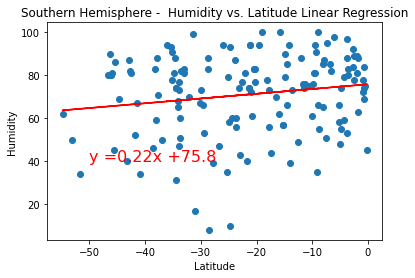

In [37]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southdf["Latitude"], southdf["Humidity"])
print(f'The r values is {rvalue}')
plt.scatter(southdf["Latitude"], southdf["Humidity"])
plt.title("Southern Hemisphere -  Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
regress_values = southdf["Latitude"] * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.plot(southdf["Latitude"], regress_values, "r-")
plt.annotate(line_eq,(-50,40), fontsize= 16, color = 'red')

plt.savefig("./Southern Humidity vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r values is 0.25968650637076124


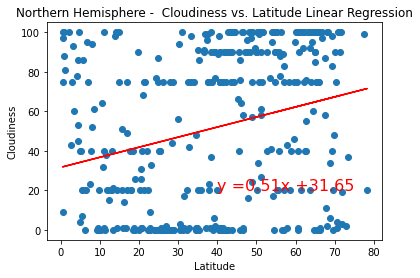

In [38]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northdf["Latitude"], northdf["Cloudiness"])
print(f'The r values is {rvalue}')
plt.scatter(northdf["Latitude"], northdf["Cloudiness"])
plt.title("Northern Hemisphere -  Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
regress_values = northdf["Latitude"] * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.plot(northdf["Latitude"], regress_values, "r-")
plt.annotate(line_eq,(40,20), fontsize= 16, color = 'red')

plt.savefig("./Northern Cloudiness vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r values is 0.45454100138997344


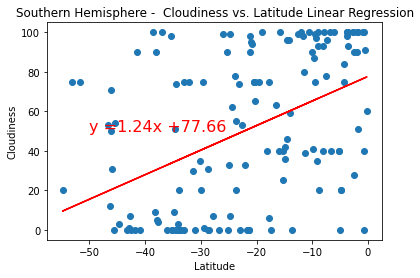

In [40]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southdf["Latitude"], southdf["Cloudiness"])
print(f'The r values is {rvalue}')
plt.scatter(southdf["Latitude"], southdf["Cloudiness"])
plt.title("Southern Hemisphere -  Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
regress_values = southdf["Latitude"] * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.plot(southdf["Latitude"], regress_values, "r-")
plt.annotate(line_eq,(-50,50), fontsize= 16, color = 'red')

plt.savefig("./Southern Cloudiness vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r values is -0.02372895060007344


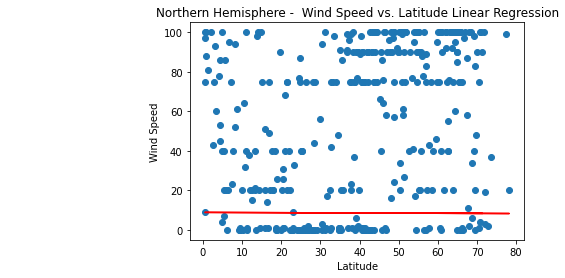

In [45]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northdf["Latitude"], northdf["Wind Speed"])
print(f'The r values is {rvalue}')
plt.scatter(northdf["Latitude"], northdf["Cloudiness"])
plt.title("Northern Hemisphere -  Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
regress_values = northdf["Latitude"] * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.plot(northdf["Latitude"], regress_values, "r-")
plt.annotate(line_eq,(-50,20), fontsize= 16, color = 'red')

plt.savefig("./Northern Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r values is -0.17657269179321505


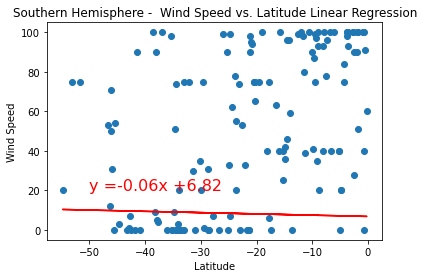

In [42]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southdf["Latitude"], southdf["Wind Speed"])
print(f'The r values is {rvalue}')
plt.scatter(southdf["Latitude"], southdf["Cloudiness"])
plt.title("Southern Hemisphere -  Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
regress_values = southdf["Latitude"] * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.plot(southdf["Latitude"], regress_values, "r-")
plt.annotate(line_eq,(-50,20), fontsize= 16, color = 'red')

plt.savefig("./Southern Wind Speed vs. Latitude Linear Regression.png")